### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [85]:
train = pd.read_csv('train.csv', index_col = 'no')
test = pd.read_csv('test.csv', index_col = 'no')

train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [3]:
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States


In [4]:
print(train.shape)
print(test.shape)

(29305, 15)
(19537, 14)


# 데이터 전처리

### 결측치 파악하기

범주형 결측치 파악

In [5]:
train['workclass'].value_counts()                 # workclass 결측치 있음, 4번째로 많은 범주에 해당

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [6]:
test['workclass'].value_counts()         

 Private             13496
 Self-emp-not-inc     1557
 Local-gov            1268
 ?                    1136
 State-gov             780
 Self-emp-inc          708
 Federal-gov           578
 Without-pay             9
 Never-worked            5
Name: workclass, dtype: int64

In [7]:
train['education'].value_counts()

 HS-grad         9435
 Some-college    6558
 Bachelors       4848
 Masters         1587
 Assoc-voc       1230
 11th            1057
 Assoc-acdm       980
 10th             816
 7th-8th          574
 Prof-school      500
 9th              430
 12th             415
 Doctorate        347
 5th-6th          334
 1st-4th          148
 Preschool         46
Name: education, dtype: int64

In [8]:
train['marital-status'].value_counts()

 Married-civ-spouse       13331
 Never-married             9673
 Divorced                  4030
 Widowed                    942
 Separated                  914
 Married-spouse-absent      394
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [9]:
train['occupation'].value_counts()                  # occupation  결측치 있음, 중간정도로 많은 범주에 해당

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [10]:
test['occupation'].value_counts()                  # occupation  결측치 있음, 중간정도로 많은 범주에 해당

 Craft-repair         2480
 Exec-managerial      2477
 Prof-specialty       2448
 Sales                2212
 Adm-clerical         2171
 Other-service        1948
 Machine-op-inspct    1211
 ?                    1141
 Transport-moving      962
 Handlers-cleaners     823
 Farming-fishing       602
 Tech-support          581
 Protective-serv       380
 Priv-house-serv        96
 Armed-Forces            5
Name: occupation, dtype: int64

In [11]:
train['relationship'].value_counts()

 Husband           11769
 Not-in-family      7637
 Own-child          4554
 Unmarried          3071
 Wife               1370
 Other-relative      904
Name: relationship, dtype: int64

In [12]:
train['race'].value_counts()                      

 White                 25081
 Black                  2776
 Asian-Pac-Islander      919
 Amer-Indian-Eskimo      290
 Other                   239
Name: race, dtype: int64

In [13]:
train['sex'].value_counts()

 Male      19621
 Female     9684
Name: sex, dtype: int64

In [14]:
train['native-country'].value_counts()             # native-country 결측치 있음, 3번째로 많은 범주에 해당

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 China                            68
 Jamaica                          68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

In [15]:
test['native-country'].value_counts()             # native-country 결측치 있음, 3번째로 많은 범주에 해당

 United-States                 17531
 Mexico                          372
 ?                               362
 Philippines                     117
 Germany                          82
 Canada                           71
 Puerto-Rico                      67
 India                            61
 El-Salvador                      59
 China                            54
 England                          52
 Italy                            45
 Cuba                             44
 Dominican-Republic               42
 South                            41
 Japan                            38
 Jamaica                          38
 Guatemala                        37
 Vietnam                          36
 Poland                           34
 Columbia                         32
 Taiwan                           26
 Ecuador                          24
 Portugal                         24
 Greece                           24
 Haiti                            24
 Nicaragua                        21
 

In [16]:
train['income'].value_counts()

0    22260
1     7045
Name: income, dtype: int64

- 숫자형 데이터 결측치 파악

In [17]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [18]:
is_question = train['age'] == " ?"
train[is_question]                           # 모든 숫자형 컬럼 확인 결과 결측치 없음!!

C:\Users\163900\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,


workclass : 1663, 
occupation : 1668, 
native-country : 495 결측치 존재

### 결측치 채우기 2번 방법 : 그대로 사용하기 (Others로 분류)

- workclass 결측치 채우기

In [19]:
train['workclass'] = train['workclass'].replace(" ?", "Others")

In [20]:
train['workclass'].value_counts()                     # train의 workclass 결측치: ?  -> Others로 변경 됐다!

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
Others                1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [21]:
test['workclass'] = test['workclass'].replace(" ?", "Others")

In [22]:
test['workclass'].value_counts()                     # test의 workclass 결측치: ?  -> Others로 변경 됐다!

 Private             13496
 Self-emp-not-inc     1557
 Local-gov            1268
Others                1136
 State-gov             780
 Self-emp-inc          708
 Federal-gov           578
 Without-pay             9
 Never-worked            5
Name: workclass, dtype: int64

- occupation 결측치 채우기

In [23]:
train['occupation'] = train['occupation'].replace(" ?", "Others")

In [24]:
train['occupation'].value_counts()                         # occupation 결측치: ?  -> Others로 변경 됐다!

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
Others                1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [25]:
test['occupation'] = test['occupation'].replace(" ?", "Others")

In [26]:
test['occupation'].value_counts()                         # test의 occupation 결측치: ?  -> Others로 변경 됐다!

 Craft-repair         2480
 Exec-managerial      2477
 Prof-specialty       2448
 Sales                2212
 Adm-clerical         2171
 Other-service        1948
 Machine-op-inspct    1211
Others                1141
 Transport-moving      962
 Handlers-cleaners     823
 Farming-fishing       602
 Tech-support          581
 Protective-serv       380
 Priv-house-serv        96
 Armed-Forces            5
Name: occupation, dtype: int64

- native-country 결측치 채우기

In [27]:
train['native-country'] = train['native-country'].replace(" ?", "Others")

In [28]:
train['native-country'].value_counts()                           # native-country 결측치: ?  -> Others로 변경 됐다!

 United-States                 26301
 Mexico                          579
Others                           495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

In [29]:
test['native-country'] = test['native-country'].replace(" ?", "Others")

In [30]:
test['native-country'].value_counts()                           # test의 native-country 결측치: ?  -> Others로 변경 됐다!

 United-States                 17531
 Mexico                          372
Others                           362
 Philippines                     117
 Germany                          82
 Canada                           71
 Puerto-Rico                      67
 India                            61
 El-Salvador                      59
 China                            54
 England                          52
 Italy                            45
 Cuba                             44
 Dominican-Republic               42
 South                            41
 Japan                            38
 Jamaica                          38
 Guatemala                        37
 Vietnam                          36
 Poland                           34
 Columbia                         32
 Taiwan                           26
 Haiti                            24
 Portugal                         24
 Ecuador                          24
 Greece                           24
 Iran                             21
 

In [31]:
 test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,Others,245274,Some-college,10,Never-married,Others,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States
48839,48,Private,185079,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States
48840,63,Private,117473,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,40,United-States


train, test 데이터 모두 교체 완료!

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education-num   29305 non-null  int64 
 4   marital-status  29305 non-null  object
 5   occupation      29305 non-null  object
 6   relationship    29305 non-null  object
 7   race            29305 non-null  object
 8   sex             29305 non-null  object
 9   capital-gain    29305 non-null  int64 
 10  capital-loss    29305 non-null  int64 
 11  hours-per-week  29305 non-null  int64 
 12  native-country  29305 non-null  object
 13  income          29305 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 4.6+ MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   fnlwgt          19537 non-null  int64 
 3   education       19537 non-null  object
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  object
 6   occupation      19537 non-null  object
 7   relationship    19537 non-null  object
 8   race            19537 non-null  object
 9   sex             19537 non-null  object
 10  capital-gain    19537 non-null  int64 
 11  capital-loss    19537 non-null  int64 
 12  hours-per-week  19537 non-null  int64 
 13  native-country  19537 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB


In [34]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', 'Others',
       ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [35]:
test['workclass'].unique()

array(['Others', ' Private', ' Self-emp-not-inc', ' Local-gov',
       ' Self-emp-inc', ' State-gov', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

### 데이터 시각화

In [39]:
# 컬럼별 시각화 익정오빠 코드 참고!

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

- age와 sex를 바이올린 형태로 시각화

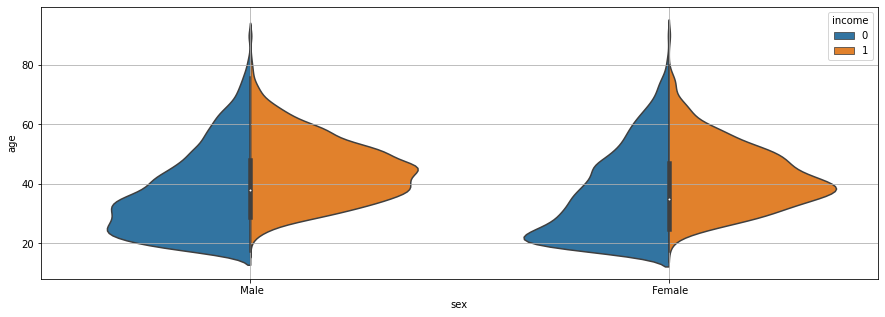

In [41]:
plt.figure(figsize=(15,5))
# 바이올린 형태로 시각화
sns.violinplot(data=train,
              x='sex',
              y='age',
              hue='income',
              split=True       
              )
plt.grid()

남자와 여자 모두 20\~37세 쯤 수입이 가장 없고 37~43세 쯤 수입이 가장 많구나! age를 세분류로 나눠도 되겠다!

- fnlwgt 분포도 분석

In [42]:
# plt.figure(figsize=(15,5))
# # 바이올린 형태로 데이터를 시각화 해주는 기능
# sns.violinplot(data=train,
#                x='Sex',
#                y='Age',
#                hue='Survived',
#                split=True    # True일 경우 두 그룹을 하나의 바이올린 형태로 나타내줌
#               )
# plt.grid()

상관관계 분석

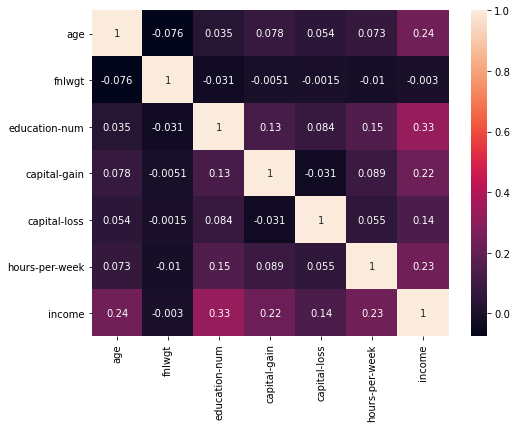

In [43]:
import matplotlib.pyplot as plt       
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(train.corr(), annot=True) # 상관관계 파악 위해 heatmap으로 수치형 데이터를 간단히 시각화

### 데이터 컬럼 병합 및 삭제

In [83]:
train.drop('education', axis = 1, inplace=True)
train.info

KeyError: "['education'] not found in axis"

# 모델 예측

### 문제, 정답 데이터로 분리

In [44]:
# train 데이터에서 정답 컬럼
y_train = train['income']
# train 데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들
X_train = train.drop('income', axis=1)
# 맨 처음에 받았던 test.csv
X_test = test

In [45]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [46]:
X_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.8+ MB


### 데이터 원핫 인코딩 하기

In [48]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
# X_train
# X_test

In [49]:
print(X_train.shape)
print(X_test.shape)

(29305, 108)
(19537, 107)


### 컬럼 개수 맞추기

In [50]:
set(X_train.columns) - set(X_test.columns)

{'native-country_ Holand-Netherlands'}

In [51]:
# 'native-country_ Holand-Netherlands'의 컬럼은 생기지만 실제로 컴퓨터가 데이터는 없는 것으로 인식함!
X_test['native-country_ Holand-Netherlands'] = 0

In [52]:
tmp = X_train.columns
for x in tmp :
    print(x)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Never-worked
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
workclass_Others
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-se

In [53]:
tmp = X_test.columns
for x in tmp :
    print(x)

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Never-worked
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
workclass_Others
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-se

In [54]:
# 위치 변경을 위해 'native-country_ Holand-Netherlands' 컬럼을 tmp 변수에 넣어줌

tmp = X_train['native-country_ Holand-Netherlands']

In [55]:
X_train.drop('native-country_ Holand-Netherlands', axis = 1, inplace=True)

In [56]:
X_train = pd.concat([X_train, tmp],axis=1)
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Others,native-country_ Holand-Netherlands
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,39,52978,10,0,1721,55,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,35,196899,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,24,60783,10,0,0,70,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,100605,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29302,21,372636,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29303,18,258474,6,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Others,native-country_ Holand-Netherlands
no,,,,,,,,,,,,,,,,,,,,,
29306,18,245274,10,0,0,16,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29307,29,83003,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29308,45,35136,13,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29309,42,64631,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29310,41,195821,16,0,1902,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,116789,9,0,0,60,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48839,48,185079,9,0,0,50,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
48840,63,117473,10,4386,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Scaler 만들기

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [60]:
transform_X_train = scaler.transform(X_train)
transform_X_train

array([[-0.9938574 ,  0.27892177, -1.1994807 , ..., -0.02106673,
        -0.13107835, -0.00584166],
       [ 0.02479914, -1.29464937, -0.03231398, ..., -0.02106673,
        -0.13107835, -0.00584166],
       [-0.26624559,  0.06781345,  1.13485273, ..., -0.02106673,
        -0.13107835, -0.00584166],
       ...,
       [-1.50318567,  0.65072802, -1.58853627, ..., -0.02106673,
        -0.13107835, -0.00584166],
       [-0.41176795, -0.30567788, -1.1994807 , ..., -0.02106673,
        -0.13107835, -0.00584166],
       [ 1.91658984, -0.89864613, -0.42136955, ..., -0.02106673,
        -0.13107835, -0.00584166]])

In [61]:
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[-1.50318567,  0.52576704, -0.03231398, ..., -0.02106673,
        -0.13107835, -0.00584166],
       [-0.70281267, -1.01041048, -0.42136955, ..., -0.02106673,
        -0.13107835, -0.00584166],
       [ 0.46136622, -1.46355496,  1.13485273, ..., -0.02106673,
        -0.13107835, -0.00584166],
       ...,
       [ 1.77106748, -0.68409192, -0.03231398, ..., -0.02106673,
        -0.13107835, -0.00584166],
       [-1.50318567, -0.36843291, -1.1994807 , ..., -0.02106673,
        -0.13107835, -0.00584166],
       [-0.55729031,  1.43796326,  0.74579716, ..., -0.02106673,
        -0.13107835, -0.00584166]])

### 모델 생성하기

In [62]:
!pip install lightgbm

In [63]:
!pip install xgboost

In [64]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [65]:
from lightgbm import LGBMClassifier 

lgb_model = LGBMClassifier(n_estimators = 1000, learning_rate=0.01, random_state=123)
lgb_model.fit(transform_X_train, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=123)

In [66]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 100, learning_rate=0.01, random_state = 123)
xgb_model.fit(transform_X_train, y_train)

C:\Users\163900\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state= 11)
rf_model.fit(transform_X_train, y_train)

RandomForestClassifier(random_state=11)

### 교차 검증하기

Standard Scaler를 적용한 LightGBM 모델 kfold 교차 검증

정확도와 f1 구하기

In [68]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [69]:
result1 = cross_val_score(lgb_model,
                         transform_X_train,
                         y_train,
                         cv = kfold
                        )

print(result1.mean())

0.872513522042239


In [70]:
f1_result1 = cross_val_score(lgb_model, # lgb 모델
                         transform_X_train,
                         y_train,
                         cv = kfold,
                         scoring='f1'
                        )

print(f1_result1.mean())

0.7117869083684442


Standard Scaler를 적용한 XGBoost 모델 kfold 교차 검증

정확도와 f1 구하기

In [71]:
result2 = cross_val_score(xgb_model,
                         transform_X_train,
                         y_train,
                         cv = kfold
                        )

print(result2.mean())

C:\Users\163900\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:34:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [72]:
f1_result2 = cross_val_score(xgb_model,
                         transform_X_train,
                         y_train,
                         cv = kfold,
                         scoring='f1'   
                        )

print(f1_result2.mean())

[21:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Standard Scaler를 적용한 RandomForest 모델 kfold 교차 검증

정확도와 f1 구하기

In [73]:
result3 = cross_val_score(rf_model,
                         transform_X_train,
                         y_train,
                         cv = kfold
                        )

print(result3.mean())

0.8514250282085231


In [74]:
f1_result3 = cross_val_score(rf_model,
                         transform_X_train,
                         y_train,
                         cv = kfold,
                         scoring='f1'   
                        )

print(f1_result3.mean())

0.6675322550482756


# Kaggle 제출용 파일 만들기

In [75]:
submission = pd.read_csv('sample_submission.csv')
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [76]:
xgb_model.fit(transform_X_train, y_train)  # 모델 학습
pre = xgb_model.predict(transform_X_test)  # 모델로 예측

In [77]:
pre

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [78]:
submission.to_csv('submission.csv', index=False)